In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
df=pd.read_csv("survey_results_public.csv",sep=";", encoding='cp1252')

ParserError: Error tokenizing data. C error: Expected 26 fields in line 6, saw 36


In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
df = df[["Age","Age1stCode","ConvertedComp","Country","YearsCodePro","YearsCode","Employment","EdLevel"]]

In [5]:
df.dropna(how="any",subset=["ConvertedComp","YearsCodePro"],inplace=True)

In [6]:
df.rename(columns={"ConvertedComp":"Salary"},inplace=True)

In [7]:
df = df[df.Employment == "Employed full-time"]
df["Employment"].unique()

array(['Employed full-time'], dtype=object)

In [8]:
df["Country"].value_counts()

United States     7613
India             2494
United Kingdom    2313
Germany           1983
Canada            1217
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: Country, Length: 154, dtype: int64

In [9]:
def pakdatainfo(lis):
    for i in range(len(lis)):
        if lis.index[i]=="Pakistan":
            print("pakistani left that gave their info is: ", lis[i])
        

In [10]:
pakdatainfo(df["Country"].value_counts())

pakistani left that gave their info is:  276


### big chunk of countries and other to their side 

In [11]:
def shortcountry(lis,cut):
    dic={}
    for i in range(len(lis)):
        if lis[i] >= cut:
            dic[lis.index[i]] = lis.index[i]
        else:
            dic[lis.index[i]]= "other"
    return dic        
    

In [12]:
dic=shortcountry(df["Country"].value_counts(),250)

In [13]:
df["Country"]=df["Country"].map(dic)
df["Country"].value_counts()

United States         7613
other                 6212
India                 2494
United Kingdom        2313
Germany               1983
Canada                1217
Brazil                1003
France                 988
Spain                  683
Australia              674
Netherlands            661
Poland                 569
Italy                  560
Russian Federation     535
Sweden                 520
Turkey                 328
Israel                 307
Switzerland            280
Pakistan               276
South Africa           259
Ireland                257
Mexico                 257
Norway                 253
Ukraine                250
Name: Country, dtype: int64

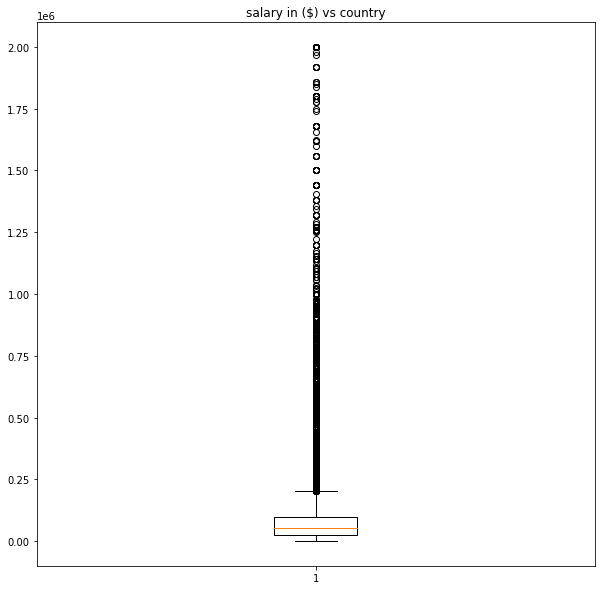

In [14]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.boxplot(df.Salary)
plt.title("salary in ($) vs country" )
plt.show()

In [15]:
df=df[df["Salary"] >= 1000]
df=df[df["Salary"] <= 80000]
df=df[df["Country"]  != "other"]

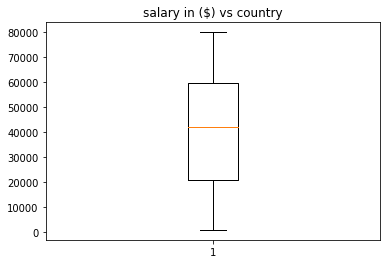

In [16]:
%matplotlib inline
plt.boxplot(df.Salary)
plt.title("salary in ($) vs country" )
plt.show()

In [17]:
df["Country"].value_counts()

India                 2310
United States         1673
Germany               1511
United Kingdom        1480
Brazil                 976
France                 865
Canada                 801
Spain                  603
Poland                 546
Netherlands            536
Russian Federation     516
Italy                  500
Sweden                 475
Australia              344
Turkey                 315
Pakistan               261
Mexico                 247
South Africa           236
Ukraine                232
Ireland                142
Norway                 126
Israel                  93
Switzerland             63
Name: Country, dtype: int64

### clearning yearscodepro

In [18]:
df["YearsCodePro"]

9         4
10        2
11        7
12       20
13        1
         ..
64048     3
64053    18
64077    12
64101    10
64122     4
Name: YearsCodePro, Length: 14851, dtype: object

In [19]:
df.dropna(how="any",subset=["YearsCodePro"],inplace=True)
df["YearsCodePro"].isnull().sum()

0

In [20]:
df.replace({"YearsCodePro": "[A-Za-z]"}," ",regex=True, inplace=True)
df["YearsCodePro"].unique()

array(['4', '2', '7', '20', '1', '3', '10', '6', '28', '15',
       '          1     ', '25', '9', '8', '12', '14', '5', '22', '26',
       '11', '21', '18', '16', '27', '13', '19', '30', '17', '23', '24',
       '38', '37', '36', '32', '39', '35', '31', '42', '33', '29', '34',
       '40', '          50      ', '43', '50', '45', '41'], dtype=object)

### clearing , transforming  education

In [21]:
df["EdLevel"].isnull().sum()
df.dropna(how="any",subset=["EdLevel"],inplace=True)
df["EdLevel"].isnull().sum()
df["EdLevel"].unique()


array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Professional degree (JD, MD, etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [22]:
def clear_edu(x):
    if "Bachelor’s degree" in x:
        return "Bachelor’s degree"
    if "Master’s degree" in x:
        return "Master’s degree"
    if "Professional degree" in x:
        return "Professional degree"
    if "Post Graduate" in x:
        return "Post Graduate"
    else:
        return "other(Primary,Secondary school)"
    

In [23]:
df["EdLevel"]=df["EdLevel"].apply(clear_edu)
df["EdLevel"].unique()

array(['Master’s degree', 'Bachelor’s degree',
       'other(Primary,Secondary school)', 'Professional degree'],
      dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder 
le_edu = LabelEncoder()
df["EdLevel"]= le_edu.fit_transform(df["EdLevel"])
df["EdLevel"].unique()


array([1, 0, 3, 2])

### transforming country

In [25]:

le_country = LabelEncoder()
df["Country"] = le_country.fit_transform(df["Country"])
df["Country"].unique()

array([21, 16, 10, 22,  2,  1,  3, 13,  4, 20,  5,  9, 17, 19,  0,  8, 11,
       12,  7, 14, 15,  6, 18])

### looking for algorithm right for data

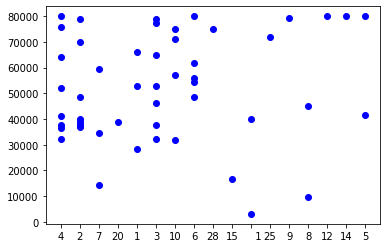

In [26]:
%matplotlib inline
plt.scatter(df.YearsCodePro.head(50),df.Salary.head(50),color="blue")
# by this plotation we can clery see the relation is not linear

In [27]:
df

,Age,Age1stCode,Salary,Country,YearsCodePro,YearsCode,Employment,EdLevel
9,22.0,14,32315.0,21,4,8,Employed full-time,1
10,23.0,13,40070.0,21,2,10,Employed full-time,0
11,49.0,42,14268.0,16,7,7,Employed full-time,3
12,53.0,14,38916.0,10,20,35,Employed full-time,3
13,27.0,13,66000.0,22,1,5,Employed full-time,3
...,...,...,...,...,...,...,...,...
64048,NaN,15,16754.0,5,3,5,Employed full-time,0
64053,NaN,18,75396.0,5,18,25,Employed full-time,0
64077,NaN,10,17928.0,14,12,20,Employed full-time,1
64101,NaN,10,28308.0,14,10,15,Employed full-time,3


In [28]:
df.drop(["Age","Age1stCode","YearsCode","Employment"],axis=1,inplace= True)


In [29]:
df.reset_index(inplace=True)
df.drop("index",axis=1,inplace=True)

In [30]:
df.tail(50)

,Salary,Country,YearsCodePro,EdLevel
14502,66895.0,11,16,0
14503,17868.0,1,3,0
14504,9900.0,1,1,0
14505,36444.0,13,6,3
14506,3348.0,5,2,0
14507,54049.0,4,1,0
14508,22056.0,3,1,1
14509,71850.0,2,9,0
14510,20358.0,21,1,3
14511,34591.0,16,12,1


In [46]:
x = df.drop("Salary",axis=1)
y = df["Salary"]

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)
from sklearn.metrics import mean_squared_error

In [33]:
from sklearn.linear_model import LinearRegression  # not used this as the graph is not linear
from sklearn.tree import DecisionTreeRegressor
des_tr_reg = DecisionTreeRegressor(random_state=0)
des_tr_reg.fit(x,y)

DecisionTreeRegressor(random_state=0)

In [34]:
y_pre = des_tr_reg.predict(x)
y_pre
#error = np.sqrt(mean_squared_error(y,y_pre))
#error

array([56479.12903226, 42541.06593407, 35229.90909091, ...,
       40590.8       , 28077.85714286, 65343.37837838])

In [35]:
print(des_tr_reg.score(x,y))

0.7538348651956152


In [36]:
from sklearn.ensemble import RandomForestRegressor
ran_for_reg = RandomForestRegressor(random_state=0)
ran_for_reg.fit(x,y)

RandomForestRegressor(random_state=0)

In [37]:
y_pre=ran_for_reg.predict(x)
error = np.sqrt(mean_squared_error(y,y_pre))
error

11282.312936037224

In [38]:
print(ran_for_reg.score(x,y))

0.751427439867816


In [39]:
sal=ran_for_reg.predict([[14,10,3]])
sal

c:\users\home\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([28690.95560065])

In [40]:
sal=des_tr_reg.predict([[1,9,3]])
sal

c:\users\home\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([33724.44444444])

In [41]:

#a=input("Enter country: ")
#b=input("Enter year of professinalism: ")
#c=input("Enter name of last education degree: ")
x=["United Kingdom",5,"Bachlour's"]


In [42]:
print(x)

['United Kingdom', 5, "Bachlour's"]


In [43]:
x1=[]
x[0:1] = le_edu.fit_transform(x[0:1])
x[2:3] = le_country.fit_transform(x[2:3])
x1.append(x)
x1

[[0, 5, 0]]

In [44]:
y=ran_for_reg.predict(x1)
print(f"your estimated salary according to given data is: {y.round(2)}")

your estimated salary according to given data is: [55333.43]


c:\users\home\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
